In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#read the dataset -- Load the dataset
df = pd.read_excel('/content/EV_Dataset_India.xlsx')

In [6]:
#name all the collumns
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [7]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [8]:
#show the dimension of the dataset
df.shape

(103, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

<ipython-input-11-86d4067a33a2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='Brand', kind='count', palette='coolwarm', height=6, aspect=2)


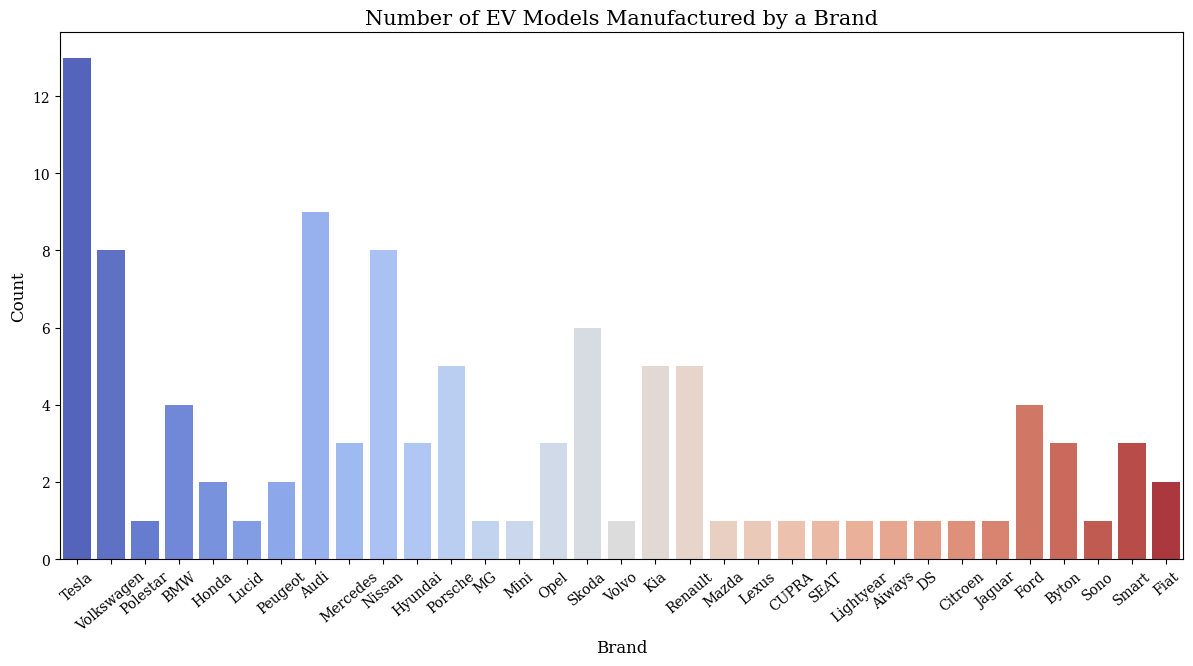

In [11]:
sns.catplot(data=df, x='Brand', kind='count', palette='coolwarm', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.show()

###Types of EV in India

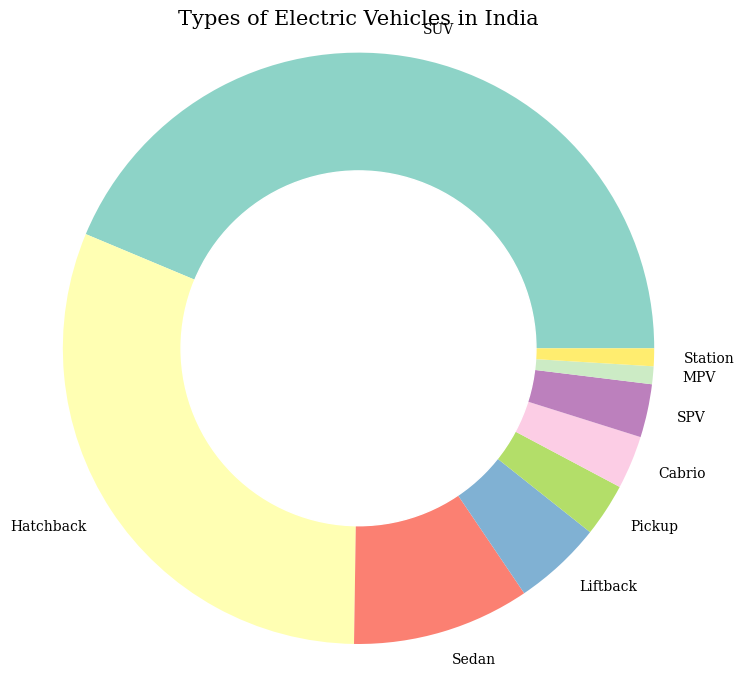

In [12]:
body_style_counts = df['BodyStyle'].value_counts()
fig, ax = plt.subplots()

# Plot the main pie chart
body_style_counts.plot.pie(
    ax=ax,
    radius=2,
    cmap='Set3',
    startangle=0,
    textprops=dict(family='serif')
)

# Add a white circle in the center to create a donut chart effect
center_circle = plt.Circle((0, 0), 1.2, color='white', fc='white')
ax.add_artist(center_circle)

# Customize the title and remove the y-axis label
plt.title(
    'Types of Electric Vehicles in India',
    family='serif',
    size=15,
    pad=100
)
plt.ylabel('')

# Show the plot
plt.show()

In [29]:
pip install squarify

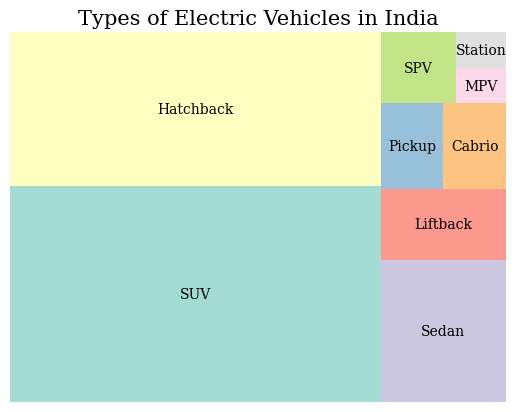

In [30]:
import squarify

# Plot a treemap
fig, ax = plt.subplots()

squarify.plot(
    sizes=body_style_counts,
    label=body_style_counts.index,
    color=sns.color_palette('Set3'),
    alpha=.8,
    text_kwargs={'fontsize': 10, 'family': 'serif'}
)

# Customize the title
plt.title('Types of Electric Vehicles in India', family='serif', size=15)

# Remove axes for cleaner look
ax.axis('off')

plt.show()

### Acceleration of an ev

<ipython-input-13-69ecc8bc091b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Brand', y='AccelSec', ci=None, palette='deep')
<ipython-input-13-69ecc8bc091b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Brand', y='AccelSec', ci=None, palette='deep')


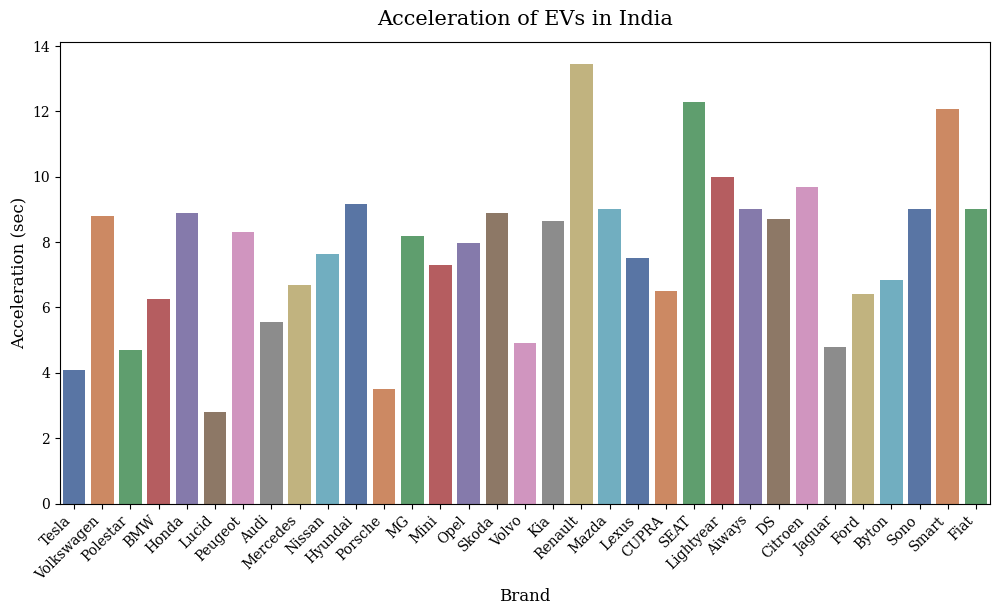

In [13]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot with Brand on the x-axis and AccelSec on the y-axis
sns.barplot(data=df, x='Brand', y='AccelSec', ci=None, palette='deep')

# Customize the tick labels
plt.xticks(family='serif', rotation=45, ha='right')
plt.yticks(family='serif')

# Set the axis labels and title
plt.xlabel('Brand', family='serif', size=12)
plt.ylabel('Acceleration (sec)', family='serif', size=12)
plt.title('Acceleration of EVs in India', family='serif', size=15, pad=12)

# Display the plot
plt.show()

<ipython-input-14-86137cfad7ba>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Brand', y='TopSpeed_KmH', ci=None, palette='deep')
<ipython-input-14-86137cfad7ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Brand', y='TopSpeed_KmH', ci=None, palette='deep')


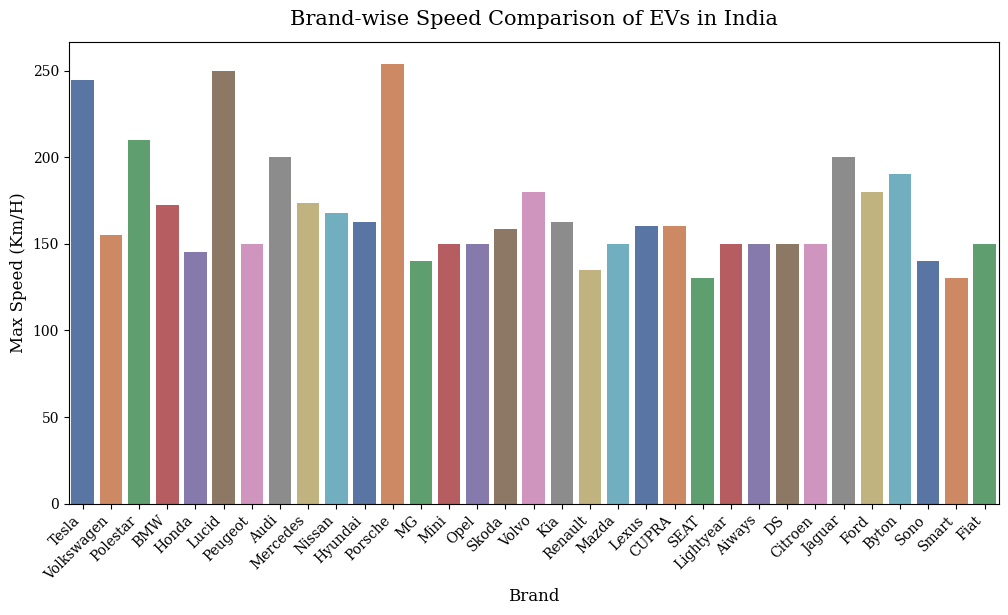

In [14]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot with Brand on the x-axis and TopSpeed_KmH on the y-axis
sns.barplot(data=df, x='Brand', y='TopSpeed_KmH', ci=None, palette='deep')

# Customize the tick labels
plt.xticks(family='serif', rotation=45, ha='right')
plt.yticks(family='serif')

# Set the axis labels and title
plt.xlabel('Brand', family='serif', size=12)
plt.ylabel('Max Speed (Km/H)', family='serif', size=12)
plt.title('Brand-wise Speed Comparison of EVs in India', family='serif', size=15, pad=12)

# Display the plot
plt.show()

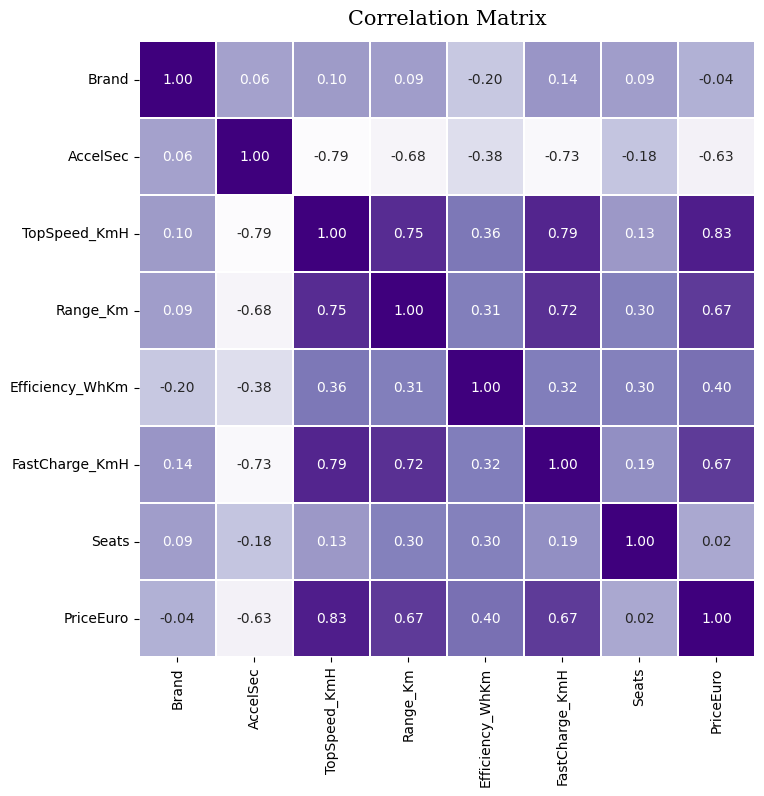

In [15]:
# Convert 'Brand' column to a categorical type
df['Brand'] = df['Brand'].astype('category')

# Convert categorical 'Brand' column to numerical codes
df['Brand'] = df['Brand'].cat.codes

plt.figure(figsize=(8, 8))
# Remove non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['number'])

# Plot the correlation matrix heatmap
correlation_matrix = numeric_df.corr()
sns.heatmap(
    data=correlation_matrix,
    annot=True,
    cmap='Purples',
    cbar=False,
    square=True,
    fmt='.2f',
    linewidths=.3
)

# Set the title
plt.title('Correlation Matrix', family='serif', size=15, pad=12)

# Show the plot
plt.show()

### K-Means Clustering

In [16]:
# encoding the categorical features

# PowerTrain feature
df['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

In [18]:
# selecting features for building a model
X = df[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]


In [19]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775
3,0.291018,-0.000150,-0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,0.261663
4,-2.602679,-0.626489,-0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,-0.049904


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

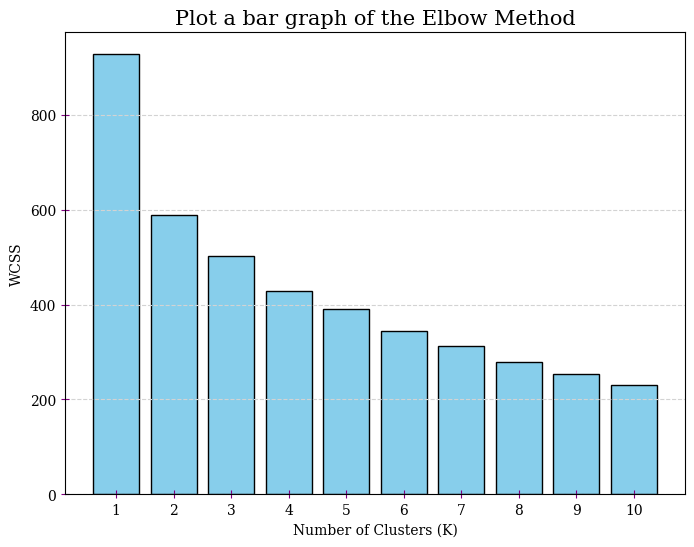

In [21]:
wcss = []

for i in range(1, 11):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
    kmean.fit(X_pca)
    wcss.append(kmean.inertia_)

plt.figure(figsize=(8, 6))
plt.title('Plot a bar graph of the Elbow Method', size=15, family='serif')
plt.bar(range(1, 11), wcss, color='skyblue', edgecolor='black')
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Clusters (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid(axis='y')
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [22]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=90)

In [23]:
pd.Series(kmean.labels_).value_counts()

,count
1,39
2,32
0,19
3,13


In [25]:
df['clusters'] = kmean.labels_

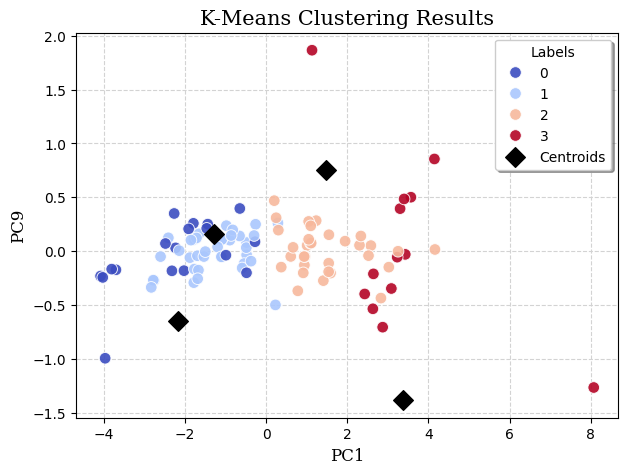

In [27]:
# Create a figure with specified size
fig, ax = plt.subplots(figsize=(7, 5))

scatter = sns.scatterplot(
    ax=ax,
    data=df_pca,
    x='PC1',
    y='PC9',
    s=70,
    hue=kmean.labels_,
    palette='coolwarm',  # Changed palette to 'coolwarm'
    alpha=0.9,
    zorder=2
)

# Plot the centroids with a different shape and color
ax.scatter(
    x=kmean.cluster_centers_[:, 0],
    y=kmean.cluster_centers_[:, 1],
    marker="D",  # Changed marker to diamond shape
    c="black",  # Changed color to black
    s=100,  # Increased size for better visibility
    label="Centroids",
    zorder=3
)

# Set labels, title, and customize ticks
ax.set_xlabel('PC1', fontfamily='serif', fontsize=12)
ax.set_ylabel('PC9', fontfamily='serif', fontsize=12)
ax.set_title('K-Means Clustering Results', fontfamily='serif', fontsize=15)

# Customize ticks
ax.tick_params(
    axis='both',
    which='major',
    labelsize=10,
    labelcolor='black',
    grid_color='lightgray',
    grid_linestyle='--',
    zorder=1
)

# Add grid
ax.grid(True)

# Add a legend with a title
ax.legend(title='Labels', fancybox=True, shadow=True)

# Display the plot
plt.show()